In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from eigenmode import eigenmode_1D

# EXAMPLE PARAMETERS FROM TRACE FORMULATION PAPER...

eps_wg = 12                   # the waveguide dielectric constant
eps_back = 1                  # the surrounding low-dielectric material
h = 0.5/np.sqrt(eps_wg)       # the thickness of the waveguide (arbitrary units)
thk_dom = 5                   # the size of the computational cell in the y direction
res = 200                     # the resolution of the computational grid
f = 1.654                     # the Bloch wavevector
num_bands = 2                 # the number of bands to compute

ms = eigenmode_1D(eps_back, eps_wg, h, thk_dom, res, k, num_bands)

Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 1000 x 1.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 5, 0)
     (0, 0, 1)
Cell volume = 5
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.2, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,0.144338,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
1 k-points
  Vector3<1.654, 0.0, 0.0>
elapsed time for initialization: 0.012586593627929688
solve_kpoint (1.654,0,0):
tefreqs:, k index, k1, k2, k3, kmag/2pi, te band 1, te band 2
Solving for bands 1 to 2...
    near maximum in trace
    linmin: converged after 7 iterations.
    iteration    1: trace = 8.34

epsilon: 1-12, mean 1.31754, harm. mean 1.0273, 2.9% > 1, 2.88675% "fill"


Text(0, 0.5, '$\\varepsilon$')

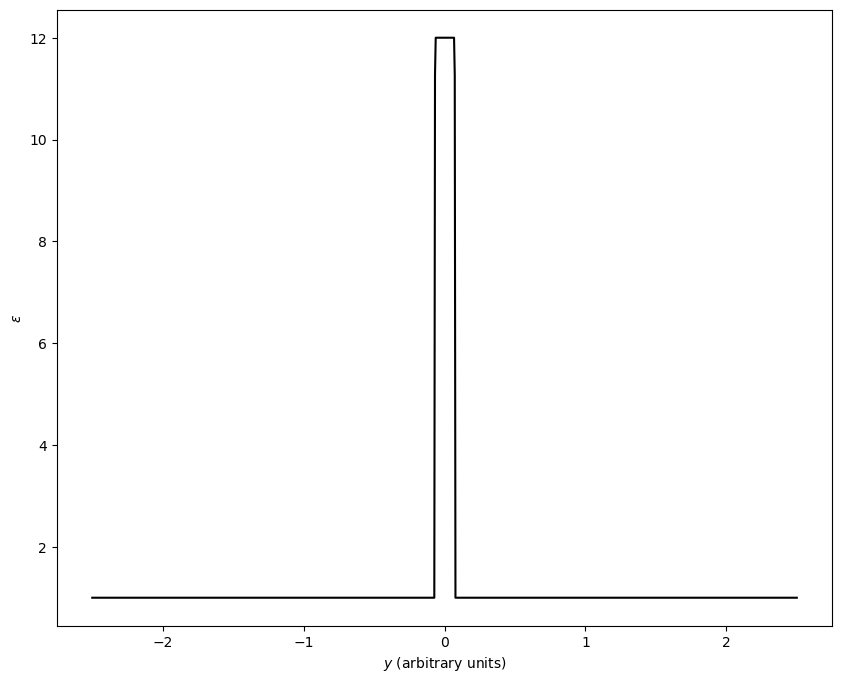

In [10]:
eps = ms.get_epsilon()
y = np.linspace(-thk_dom/2,thk_dom/2,eps.size)

plt.figure(figsize=(10,8))
plt.plot(y, np.real(eps), "black")
plt.xlabel("$y$ (arbitrary units)")
plt.ylabel("$\\varepsilon$")

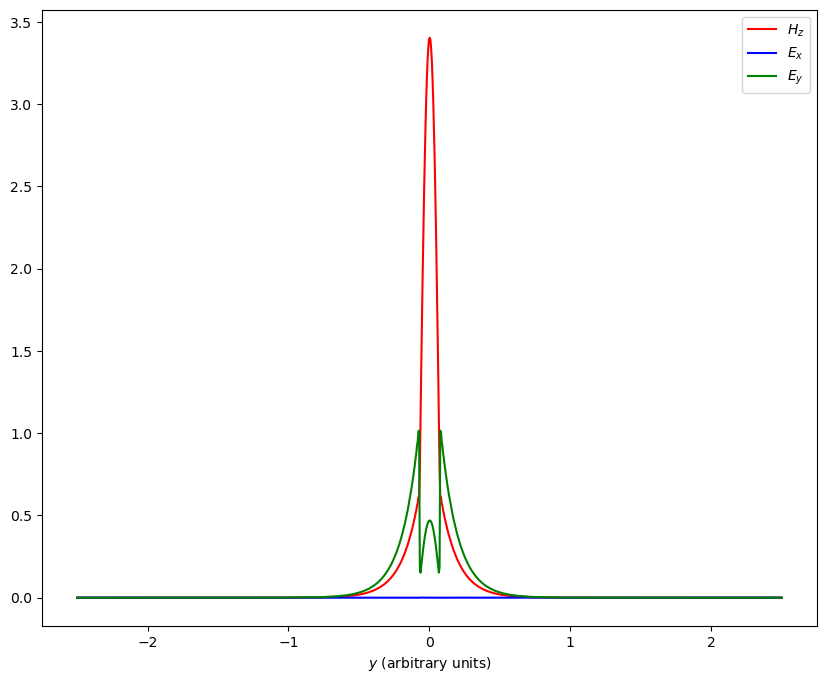

In [11]:
band_t = 1
hz1 = ms.get_hfield(band_t)[:,0,0,2] # the z component of band t
ex1 = ms.get_efield(band_t)[:,0,0,0] # the x component of band t
ey1 = ms.get_efield(band_t)[:,0,0,1] # the y component of band t


plt.figure(figsize=(10,8))
plt.plot(y, np.real(hz1), "r-", label="$H_z$")
plt.plot(y, np.real(ex1), "b-", label="$E_x$")
plt.plot(y, np.real(ey1), "g-", label="$E_y$")

plt.xlabel("$y$ (arbitrary units)")

plt.legend()

In [12]:
with open('Eigenmode.txt', 'w') as f:
    for i in range(np.size(y)):
        f.write("%s %s %s\n" % (y[i], np.real(hz1[i]), np.real(ey1[i])))